In [1]:
import numpy as np
import pandas as pd
import fastparquet
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

/home/dan/Apps/anaconda3/envs/financial-ml/lib/python3.6/site-packages/fastparquet/encoding.py:222: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  Numpy8 = numba.jitclass(spec8)(NumpyIO)
/home/dan/Apps/anaconda3/envs/financial-ml/lib/python3.6/site-packages/fastparquet/encoding.py:224: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  Numpy32 = numba.jitclass(spec32)(NumpyIO)


In [2]:
def get_descriptive_stats(series):
    functions = (pd.Series.mean, pd.Series.std, pd.Series.skew, pd.Series.kurt, pd.Series.autocorr)
    desc_stats = {f.__name__: f(series) for f in functions}
    return pd.Series(desc_stats, name=series.name)

def standardize_rets(rets):
    return (rets - rets.mean()) / rets.std()

In [3]:
def plot_autocorr(bar_types, bar_returns):
    fig, axes = plt.subplots(nrows=len(bar_types), figsize=(9,6))

    for i, (returns, bar_type) in enumerate(zip(bar_returns, bar_types)):
        sm.graphics.tsa.plot_acf(returns, lags=120, ax=axes[i],
                                 unbiased=True, fft=True,
                                 zero=False, title=f'{bar_type} AutoCorr')
    plt.tight_layout()


def plot_hist(bar_types, bar_returns):
    fig, axes = plt.subplots(nrows=len(bar_types), figsize=(7,5))

    for i, (returns, bar_type) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(returns, ax=axes[i], kde=False, label=bar_type)
        g.set(yscale='log')
        axes[i].legend()
    plt.tight_layout()


def plot_dist(bar_types, bar_standardized_returns):
    plt.figure(figsize=(8,5))

    sns.kdeplot(np.random.normal(size=1000000), label='Normal', color='black', ls='--')

    for (standardized_returns, bar_type) in zip(bar_standardized_returns, bar_types):
        sns.kdeplot(standardized_returns, label=bar_type)

    plt.legend()
    plt.xlim(-5, 5)


# 1 Min

In [4]:
DIR = 'data/1min/'

time = pd.read_parquet(DIR + 'time.parq')
tick = pd.read_parquet(DIR + 'tick.parq')
volume = pd.read_parquet(DIR + 'volume.parq')
dollar = pd.read_parquet(DIR + 'dollar.parq')

# print('TIME', time.head(5), sep='\n')
# print('TICK', tick.head(5), sep='\n')
# print('VOLUME', volume.head(5), sep='\n')
# print('DOLLAR', dollar.head(5), sep='\n')

In [5]:
# compute log returns
time_returns = np.log(time['close']).diff().dropna()
tick_returns = np.log(tick['close']).diff().dropna()
volume_returns = np.log(volume['close']).diff().dropna()
dollar_returns = np.log(dollar['close']).diff().dropna()

print('Test Statistics')
print('Time:  ', stats.jarque_bera(time_returns))
print('Tick:  ', stats.jarque_bera(tick_returns))
print('Volume:', stats.jarque_bera(volume_returns))
print('Dollar:', stats.jarque_bera(dollar_returns))

Test Statistics
Time:   (1692282792.737089, 0.0)
Tick:   (1164558399.507067, 0.0)
Volume: (3979789684.44751, 0.0)
Dollar: (2424545063.3036385, 0.0)


In [6]:
rets = [time_returns, tick_returns, volume_returns, dollar_returns]
names = ['Time', 'Tick', 'Volume', 'Dollar']

desc_stats_list = [get_descriptive_stats(ret) for ret in rets]
desc_stats = pd.concat(desc_stats_list, axis=1)
desc_stats.columns = names
desc_stats


,Time,Tick,Volume,Dollar
mean,0.000001,0.000001,0.000002,0.000002
std,0.001461,0.001385,0.001486,0.001483
skew,-0.608686,-0.905102,1.855301,-0.384071
kurt,186.349355,154.486663,291.750292,227.438726
autocorr,0.019353,0.042129,0.002584,-0.032502


In [7]:
# standardize the returns
time_standard = standardize_rets(time_returns)
tick_standard = standardize_rets(tick_returns)
volume_standard = standardize_rets(volume_returns)
dollar_standard = standardize_rets(dollar_returns)

standardized_rets = [standardize_rets(ret) for ret in rets]

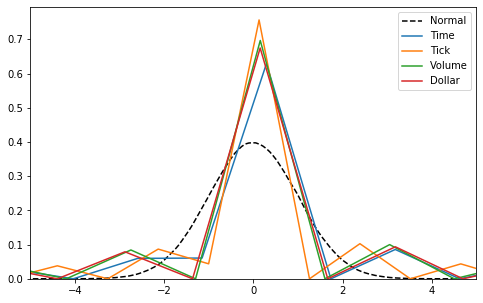

In [8]:
plot_dist(names, standardized_rets)

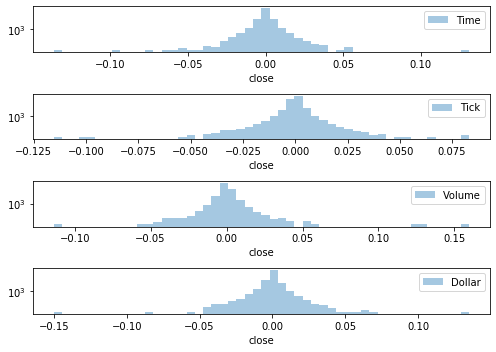

In [9]:
plot_hist(names, rets)

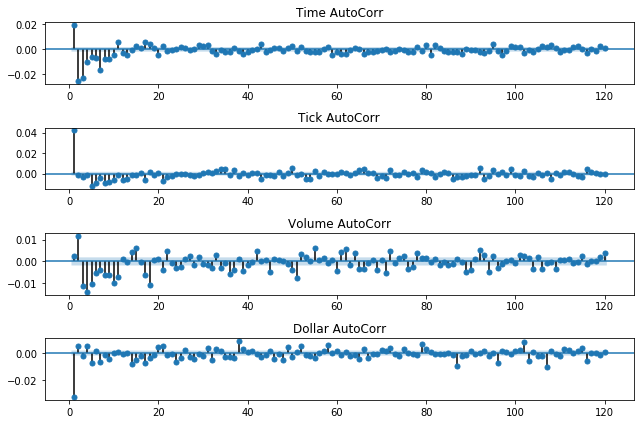

In [10]:
plot_autocorr(names, rets)

# 5 Min

In [11]:
DIR = 'data/5min/'

time = pd.read_parquet(DIR + 'time.parq')
tick = pd.read_parquet(DIR + 'tick.parq')
volume = pd.read_parquet(DIR + 'volume.parq')
dollar = pd.read_parquet(DIR + 'dollar.parq')

# print('TIME', time.head(5), sep='\n')
# print('TICK', tick.head(5), sep='\n')
# print('VOLUME', volume.head(5), sep='\n')
# print('DOLLAR', dollar.head(5), sep='\n')

In [12]:
# compute log returns
time_returns = np.log(time['close']).diff().dropna()
tick_returns = np.log(tick['close']).diff().dropna()
volume_returns = np.log(volume['close']).diff().dropna()
dollar_returns = np.log(dollar['close']).diff().dropna()

print('Test Statistics')
print('Time:  ', stats.jarque_bera(time_returns))
print('Tick:  ', stats.jarque_bera(tick_returns))
print('Volume:', stats.jarque_bera(volume_returns))
print('Dollar:', stats.jarque_bera(dollar_returns))

Test Statistics
Time:   (377296659.2048938, 0.0)
Tick:   (17951167.394844834, 0.0)
Volume: (54796155.738535546, 0.0)
Dollar: (19122016.387911867, 0.0)


In [13]:
rets = [time_returns, tick_returns, volume_returns, dollar_returns]
names = ['Time', 'Tick', 'Volume', 'Dollar']

desc_stats_list = [get_descriptive_stats(ret) for ret in rets]
desc_stats = pd.concat(desc_stats_list, axis=1)
desc_stats.columns = names
desc_stats


,Time,Tick,Volume,Dollar
mean,0.000007,0.000007,0.000007,0.000007
std,0.003210,0.003110,0.003215,0.003122
skew,-2.196620,-0.677577,-0.357132,-0.569393
kurt,192.873424,42.055239,73.874618,43.609947
autocorr,-0.057247,-0.010729,-0.030786,-0.009034


In [14]:
# standardize the returns
time_standard = standardize_rets(time_returns)
tick_standard = standardize_rets(tick_returns)
volume_standard = standardize_rets(volume_returns)
dollar_standard = standardize_rets(dollar_returns)

standardized_rets = [standardize_rets(ret) for ret in rets]

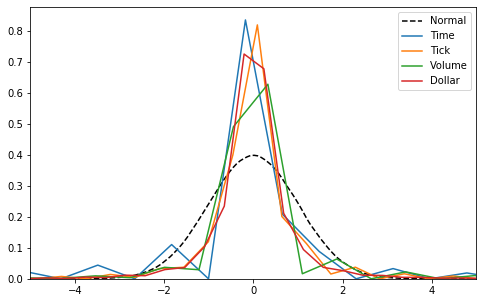

In [15]:
plot_dist(names, standardized_rets)

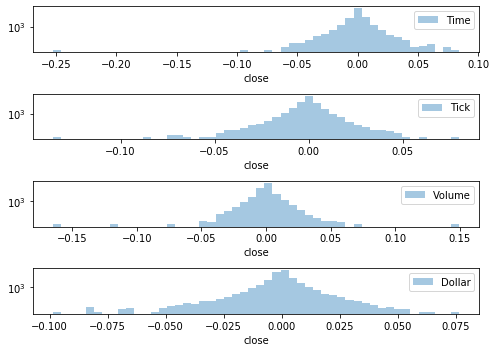

In [16]:
plot_hist(names, rets)

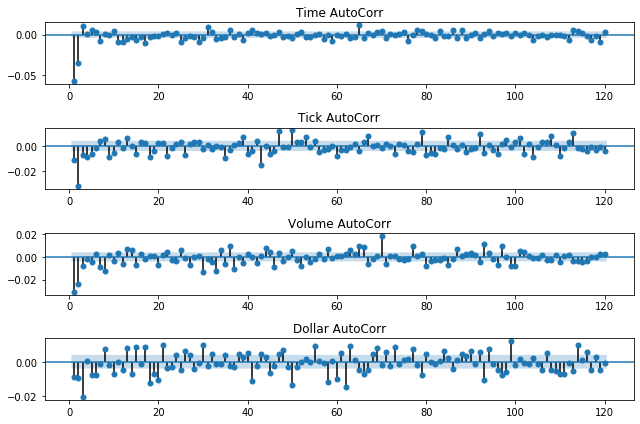

In [17]:
plot_autocorr(names, rets)

# 10 Min

In [18]:
DIR = 'data/10min/'

time = pd.read_parquet(DIR + 'time.parq')['2018':'2019']
tick = pd.read_parquet(DIR + 'tick.parq')['2018':'2019']
volume = pd.read_parquet(DIR + 'volume.parq')['2018':'2019']
dollar = pd.read_parquet(DIR + 'dollar.parq')['2018':'2019']

# print('TIME', time.head(5), sep='\n')
# print('TICK', tick.head(5), sep='\n')
# print('VOLUME', volume.head(5), sep='\n')
# print('DOLLAR', dollar.head(5), sep='\n')

In [19]:
# compute log returns
time_returns = np.log(time['close']).diff().dropna()
tick_returns = np.log(tick['close']).diff().dropna()
volume_returns = np.log(volume['close']).diff().dropna()
dollar_returns = np.log(dollar['close']).diff().dropna()

print('Test Statistics')
print('Time:  ', stats.jarque_bera(time_returns))
print('Tick:  ', stats.jarque_bera(tick_returns))
print('Volume:', stats.jarque_bera(volume_returns))
print('Dollar:', stats.jarque_bera(dollar_returns))

Test Statistics
Time:   (26340584.28570704, 0.0)
Tick:   (5787335.260381502, 0.0)
Volume: (8449667.119410157, 0.0)
Dollar: (4702747.528149431, 0.0)


In [13]:
rets = [time_returns, tick_returns, volume_returns, dollar_returns]
names = ['Time', 'Tick', 'Volume', 'Dollar']

desc_stats_list = [get_descriptive_stats(ret) for ret in rets]
desc_stats = pd.concat(desc_stats_list, axis=1)
desc_stats.columns = names
desc_stats


,Time,Tick,Volume,Dollar
mean,-0.000014,-0.000009,-0.000009,-0.000009
std,0.003744,0.003106,0.003052,0.003062
skew,0.261435,0.354042,0.216888,0.271315
kurt,31.068895,14.824319,16.777520,10.778692
autocorr,-0.025115,-0.013839,-0.007044,-0.004109


In [14]:
# standardize the returns
time_standard = standardize_rets(time_returns)
tick_standard = standardize_rets(tick_returns)
volume_standard = standardize_rets(volume_returns)
dollar_standard = standardize_rets(dollar_returns)

standardized_rets = [standardize_rets(ret) for ret in rets]

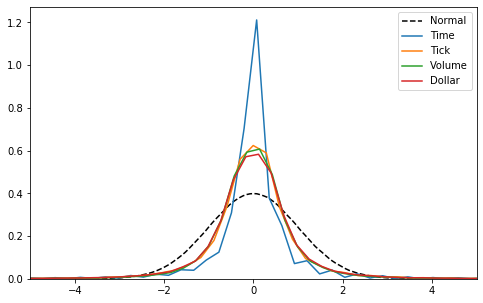

In [15]:
plot_dist(names, standardized_rets)

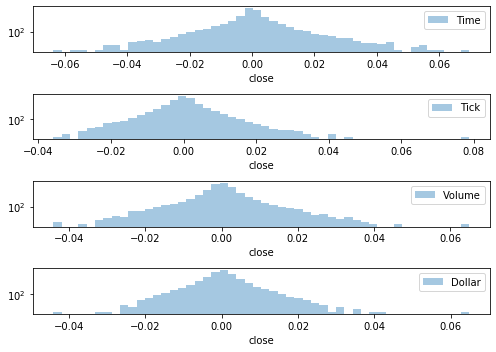

In [16]:
plot_hist(names, rets)

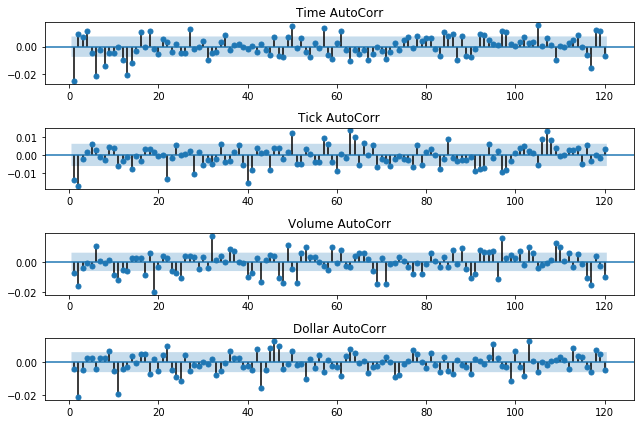

In [17]:
plot_autocorr(names, rets)

# 15 Min

In [42]:
DIR = 'data/15min/'

time = pd.read_parquet(DIR + 'time.parq')['2018':'2019']
tick = pd.read_parquet(DIR + 'tick.parq')['2018':'2019']
volume = pd.read_parquet(DIR + 'volume.parq')['2018':'2019']
dollar = pd.read_parquet(DIR + 'dollar.parq')['2018':'2019']

# print('TIME', time.head(5), sep='\n')
# print('TICK', tick.head(5), sep='\n')
# print('VOLUME', volume.head(5), sep='\n')
# print('DOLLAR', dollar.head(5), sep='\n')

In [43]:
# compute log returns
time_returns = np.log(time['close']).diff().dropna()
tick_returns = np.log(tick['close']).diff().dropna()
volume_returns = np.log(volume['close']).diff().dropna()
dollar_returns = np.log(dollar['close']).diff().dropna()

print('Test Statistics')
print('Time:  ', stats.jarque_bera(time_returns))
print('Tick:  ', stats.jarque_bera(tick_returns))
print('Volume:', stats.jarque_bera(volume_returns))
print('Dollar:', stats.jarque_bera(dollar_returns))

Test Statistics
Time:   (1697685.3914697424, 0.0)
Tick:   (286698.59636507777, 0.0)
Volume: (896672.1449198839, 0.0)
Dollar: (397139.80756796745, 0.0)


In [44]:
rets = [time_returns, tick_returns, volume_returns, dollar_returns]
names = ['Time', 'Tick', 'Volume', 'Dollar']

desc_stats_list = [get_descriptive_stats(ret) for ret in rets]
desc_stats = pd.concat(desc_stats_list, axis=1)
desc_stats.columns = names
desc_stats


,Time,Tick,Volume,Dollar
mean,-0.000021,-0.000014,-0.000013,-0.000013
std,0.004531,0.003775,0.003739,0.003749
skew,0.225367,0.222707,0.219479,0.284963
kurt,29.616908,10.043663,17.407151,11.562820
autocorr,-0.010532,-0.020704,-0.018662,-0.022914


In [45]:
# standardize the returns
time_standard = standardize_rets(time_returns)
tick_standard = standardize_rets(tick_returns)
volume_standard = standardize_rets(volume_returns)
dollar_standard = standardize_rets(dollar_returns)

standardized_rets = [standardize_rets(ret) for ret in rets]

In [47]:
len(tick)

68089

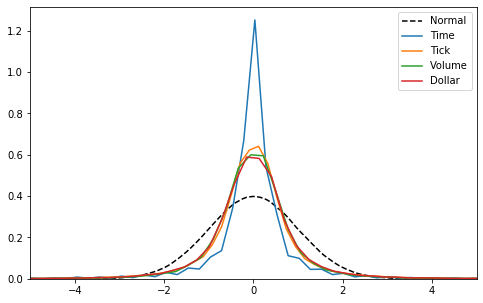

In [48]:
plot_dist(names, standardized_rets)

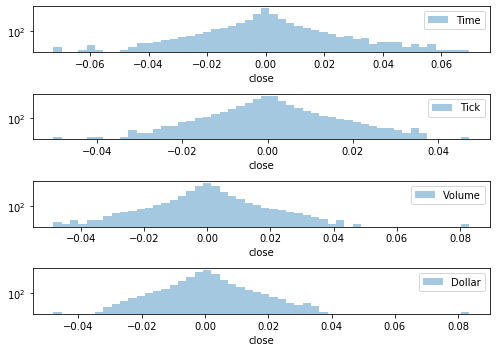

In [49]:
plot_hist(names, rets)

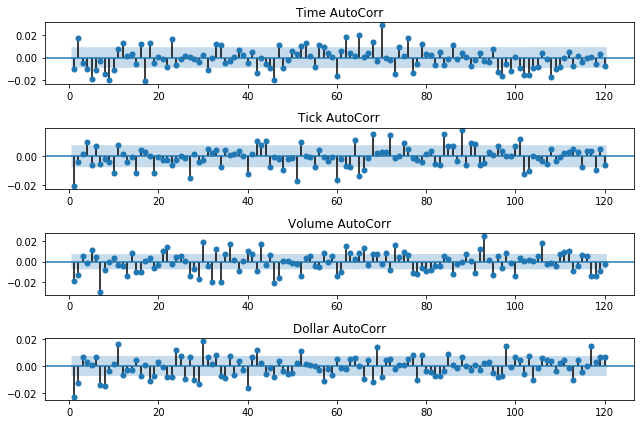

In [50]:
plot_autocorr(names, rets)

# 30 Min

In [33]:
DIR = 'data/30min/'

time = pd.read_parquet(DIR + 'time.parq')
tick = pd.read_parquet(DIR + 'tick.parq')
volume = pd.read_parquet(DIR + 'volume.parq')
dollar = pd.read_parquet(DIR + 'dollar.parq')

# print('TIME', time.head(5), sep='\n')
# print('TICK', tick.head(5), sep='\n')
# print('VOLUME', volume.head(5), sep='\n')
# print('DOLLAR', dollar.head(5), sep='\n')

In [34]:
# compute log returns
time_returns = np.log(time['close']).diff().dropna()
tick_returns = np.log(tick['close']).diff().dropna()
volume_returns = np.log(volume['close']).diff().dropna()
dollar_returns = np.log(dollar['close']).diff().dropna()

print('Test Statistics')
print('Time:  ', stats.jarque_bera(time_returns))
print('Tick:  ', stats.jarque_bera(tick_returns))
print('Volume:', stats.jarque_bera(volume_returns))
print('Dollar:', stats.jarque_bera(dollar_returns))

Test Statistics
Time:   (1241596.8916838174, 0.0)
Tick:   (538184.2256346684, 0.0)
Volume: (642140.3850403951, 0.0)
Dollar: (2552287.614232235, 0.0)


In [35]:
rets = [time_returns, tick_returns, volume_returns, dollar_returns]
names = ['Time', 'Tick', 'Volume', 'Dollar']

desc_stats_list = [get_descriptive_stats(ret) for ret in rets]
desc_stats = pd.concat(desc_stats_list, axis=1)
desc_stats.columns = names
desc_stats


,Time,Tick,Volume,Dollar
mean,0.000042,0.000041,0.000041,0.000040
std,0.007322,0.007246,0.007432,0.007440
skew,-0.661823,-0.434556,-0.365094,-0.622136
kurt,27.018617,17.789936,19.455865,38.794524
autocorr,-0.024047,-0.027825,-0.028339,-0.032794


In [36]:
# standardize the returns
time_standard = standardize_rets(time_returns)
tick_standard = standardize_rets(tick_returns)
volume_standard = standardize_rets(volume_returns)
dollar_standard = standardize_rets(dollar_returns)

standardized_rets = [standardize_rets(ret) for ret in rets]

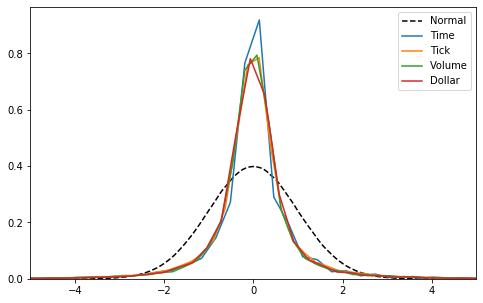

In [37]:
plot_dist(names, standardized_rets)

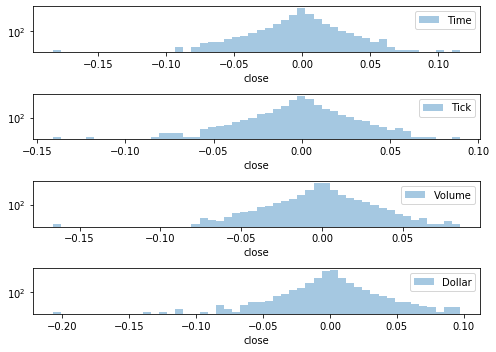

In [38]:
plot_hist(names, rets)

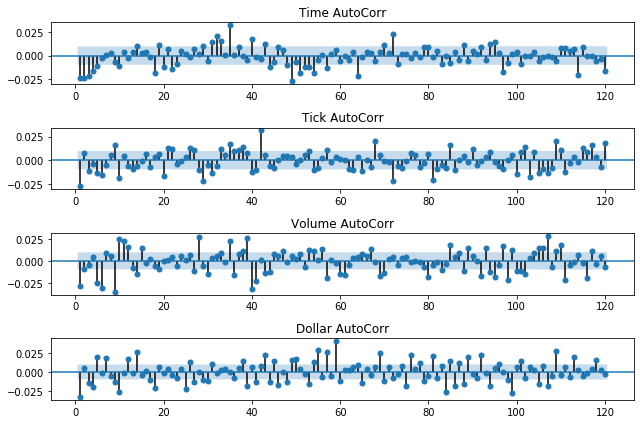

In [39]:
plot_autocorr(names, rets)